In [3]:
# Clustering and Dimentionnality Reduction

<div class="alert alert-block alert-danger">

1. Import the CIFAR-10 dataset using the following code and create a new dataset containing only the following classes: "airplane," "automobile," "bird," and "cat."

<div/>

<div class="alert alert-block alert-warning">The CIFAR-10 dataset is composed of 60000 RGB images( 32x32 pixels), categorized into 10 classes with 6000 images per class. It is divided into 50000 training images and 10000 test images.
<div/>

In [4]:
from matplotlib import pyplot as plt
from keras.datasets import cifar10
import numpy as np
# load dataset
(trainX, trainy), _ = cifar10.load_data()
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))

 33136640/170498071 ━━━━━━━━━━━━━━━━━━━━ 16:35 7us/step

KeyboardInterrupt: 

<div class="alert alert-block alert-danger">


2. Visualize some samples from the dataset with their corresponding labels.

3. Normalize the training data by dividing all values by 255.

4. Visualize the data using a 2D plot by applying dimensionality reduction based on PCA with two components.

5. Apply the K-means algorithm, K-means with PCA (with a variance of 95%), and K-means with LDA (3 components) on the normalized training data.

6. Visualize the data after clustering using a 2D plot (use PCA with 2 components for dimensionality reduction) for each model. What do you observe?

7. Compute the Davies-Bouldin score for all generated models.

8. Display the confusion matrix and the classification reports for all models. What do you observe?

9. Display some misclassifications for the best model (image with the true label and predicted label).

10. Try to enhance the performance of the best model.
<div/>

NameError: name 'trainX' is not defined

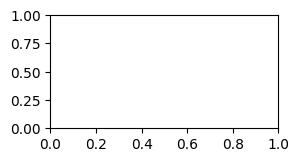

In [ ]:
# Visualize samples
plt.figure(figsize=(10, 5))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(trainX[i])
    plt.title(label_names[trainy[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Normalize the training and test data
trainX_normalized = trainX.astype('float32') / 255.0
testX_normalized = testX.astype('float32') / 255.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
data = np.array([
    [2, 1, 0],
    [4, 1.5, 1],
    [3, 1, 0],
    [3.5, 0.5, 1],
    [2, 0.5, 0],
    [5.5, 1, 1],
    [1, 1, 0]
])
X = data[:, :2]  # Features: age, cholesterol
y = data[:, 2]   # Labels: stroke

# Part 1: Plot the data
def plot_data(X, y):
    for i in range(len(y)):
        if y[i] == 0:
            plt.scatter(X[i, 0], X[i, 1], color='red', label='Stroke=0' if i == 0 else "")
        else:
            plt.scatter(X[i, 0], X[i, 1], color='blue', label='Stroke=1' if i == 1 else "")
    plt.xlabel('Age')
    plt.ylabel('Cholesterol')
    plt.legend()
    plt.title('Data Visualization')
    plt.show()

plot_data(X, y)

# Part 2: Predict parameters in first iteration
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_gradients(X, y, theta):
    m = len(y)
    z = np.dot(X, theta)
    h = sigmoid(z)
    gradients = (1 / m) * np.dot(X.T, (h - y))
    return gradients

# Add intercept term
X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))  # Add a column of ones for theta_0
theta = np.zeros(X_with_intercept.shape[1])  # Initialize theta to zeros
alpha = 0.01  # Learning rate

# Compute gradients and update parameters
gradients = compute_gradients(X_with_intercept, y, theta)
theta = theta - alpha * gradients
print("Updated Parameters (theta):", theta)

# Part 3: Compute cross-entropy loss
def compute_loss(X, y, theta):
    m = len(y)
    z = np.dot(X, theta)
    h = sigmoid(z)
    loss = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

loss = compute_loss(X_with_intercept, y, theta)
print("Cross-Entropy Loss:", loss)
